<div style="text-align:center">
  <h1 style="color:red;">XGBOOST ALGORITHM FOR CLASSIFICATION</h1>
</div>

<div style="padding-top:1px;padding-left:20px;">
<h3 style="color:green;">réalisé par :</h3>
<div style="padding-left:80px;">
<h2>EL HARIRI OMAR</h2>
<h2>ASSKLOU MERIEM</h2>
</div>
<div style="padding-top:1px;padding-left:20px;">
<h3 style="color:green;">Encadre par  :</h3>
<div style="padding-left:80px;">
<h2>Pr. GHAZDALI Abdelghani</h2>
<h2>Pr. Khalfi Hamza</h2>
</div>
</div>

# importer les bibliothèques et notre model

In [26]:
import XGBClassifierBase as XGBClassifierBase
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# importer les données

In [27]:
waterdata = pd.read_csv("water_potability.csv")
waterdata

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


Prendre 1000 individus comme échantillon

In [28]:
waterdata=waterdata.head(1000)

Recherche des valeurs manquantes

In [29]:
# Finding missing values.
waterdata.isnull().sum()

ph                 148
Hardness             0
Solids               0
Chloramines          0
Sulfate            244
Conductivity         0
Organic_carbon       0
Trihalomethanes     51
Turbidity            0
Potability           0
dtype: int64

# Visualisation 

Compter la classification de la potabilité et l'afficher dans un diagramme circulaire

In [30]:

waterdata["Potability"].value_counts()

0    680
1    320
Name: Potability, dtype: int64

<Axes: ylabel='Potability'>

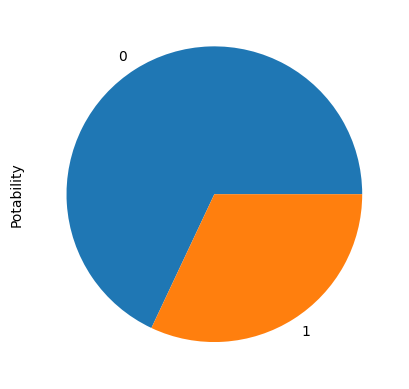

In [31]:
waterdata.Potability.value_counts().plot(kind='pie')

# Traitement des données manquantes  : imputation des valeurs manquantes par la moyenne des colonnes.

In [32]:
waterdata['ph'] = waterdata['ph'].fillna(waterdata['ph'].mean())
waterdata['Sulfate'] = waterdata['Sulfate'].fillna(waterdata['Sulfate'].mean())
waterdata['Trihalomethanes'] = waterdata['Trihalomethanes'].fillna(waterdata['Trihalomethanes'].mean())

C:\Users\omare\AppData\Local\Temp\ipykernel_21212\3403310980.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  waterdata['ph'] = waterdata['ph'].fillna(waterdata['ph'].mean())
C:\Users\omare\AppData\Local\Temp\ipykernel_21212\3403310980.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  waterdata['Sulfate'] = waterdata['Sulfate'].fillna(waterdata['Sulfate'].mean())
C:\Users\omare\AppData\Local\Temp\ipykernel_21212\3403310980.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [33]:
waterdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               1000 non-null   float64
 1   Hardness         1000 non-null   float64
 2   Solids           1000 non-null   float64
 3   Chloramines      1000 non-null   float64
 4   Sulfate          1000 non-null   float64
 5   Conductivity     1000 non-null   float64
 6   Organic_carbon   1000 non-null   float64
 7   Trihalomethanes  1000 non-null   float64
 8   Turbidity        1000 non-null   float64
 9   Potability       1000 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 78.2 KB


# Import Data Pre-processing Libraries

In [34]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

 # Préparation des données pour la prédiction

In [35]:
# RSeparate the data set columns in to dependant and independant variables
X = waterdata.drop('Potability',axis=1).values
y = waterdata['Potability'].values

# Split the dataset into train test parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

# Normalisation des données

In [36]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Modélisation de la potabilité de l'eau à l'aide d'un classificateur XGBoost

In [37]:
model = XGBClassifierBase.XGBClassifierBase()
model.fit(X_train,y_train)

# Évaluation de la performance du modèle

In [38]:
from sklearn.metrics import accuracy_score
# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test,prob=False)

# Calculer la précision du modèle
accuracy = accuracy_score(y_test, y_pred)

print('La précision du modèle XGBoost est de {:.2f}%'.format(accuracy * 100))

La précision du modèle XGBoost est de 79.20%


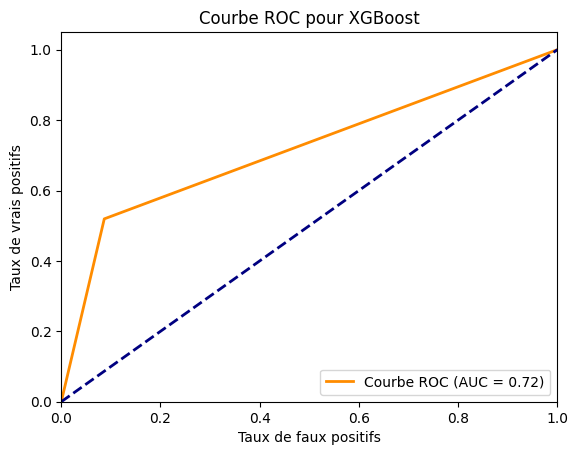

In [39]:
from sklearn.metrics import roc_curve, auc


fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC pour XGBoost')
plt.legend(loc="lower right")
plt.show()